## **Course 6 Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

# Course 6 End-of-course project: Predicting tips 

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the [PACE strategy document](https://docs.google.com/document/d/1hPtIs4X7c5xmLSi8qs7Og2FEQHkELXBC_pGuJI1jF9o/template/preview?resourcekey=0-mSL0tC7opaF8XIOdXa1JIw).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# **Predict tips using machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you **build a machine learning model to predict if a customer will not leave a tip**. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips, and the ability to filter out people who don't tip would help increase driver revenue. 

## **PACE stages**





### Plan stage

In this stage, consider the following questions:

1.   **What are you being asked to do?**
_Predict if a customer will **not** leave a tip._

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  > _Drivers who didn't receive tips will probably be upset that the app told them a customer would leave a tip. If it happened often, drivers might not trust the app._
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  > _Drivers are unlikely to pick up people who are predicted to not leave tips. Customers will have difficulty finding a taxi that will pick them up, and might get angry at the taxi company. Even when the model is correct, people who can't afford to tip will find it more difficult to get taxis, which limits the accessibility of taxi service to those who pay extra._
3.   **Do the benefits of such a model outweigh the potential problems?**  
  > _It's not good to disincentivize drivers from picking up customers. It could also cause a customer backlash. The problems seem to outweigh the benefits._
4.   **Would you proceed with the request to build this model? Why or why not?**
  >_No. Effectively limiting equal access to taxis is ethically problematic, and carries a lot of risk._
5.   **Can the objective be modified to make it less problematic?**
  >_We can build a model that predicts the most generous customers. This could accomplish the goal of helping taxi drivers increase their earnings from tips while preventing the wrongful exclusion of certain people from using taxis._


Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  **What features do you need to make this prediction?** 
  > _Ideally, we'd have behavioral history for each customer, so we could know how much they tipped on previous taxi rides. We'd also want times, dates, and locations of both pickups and dropoffs, estimated fares, and payment method._

2.  **What would be the target variable?**
  > _The target variable would be a binary variable (1 or 0) that indicates whether or not the customer is expected to tip ≥ 20%._

3.  **What metric should you use to evaluate your model? Do you have enough information to decide this now?**
  > _This is a supervised learning, classification task. We could use accuracy, precision, recall, F-score, area under the ROC curve, or a number of other metrics. However, we don't have enough information at this time to know which are most appropriate. We need to know the class balance of the target variable._

**_Complete the following steps to begin:_**

#### **Step 1: Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Now read in the dataset as `df0` and inspect the first five rows.

In [2]:
# Read in dataset

df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Analyze stage

#### **Step 2: Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the dataframe.

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [4]:
# Subset the data to isolate only customers who paid by credit card

# Copy df0 and assign to df1
df1 = df0.copy() 

# Filter df1 to contain only credit card customers
df1 = df1[df1['payment_type']==1]

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [5]:
# Create tip % col
df1['tip_percent'] = df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [6]:
# Create 'generous' col (target)
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>


##### **Features**

Which columns are obviously unpredictive of tip percentage? Refer to the data dictionary.

Drop `Unnamed: 0` and `store_and_fwd_flag` columns. Assign the result back to `df1`.

In [7]:
# Drop 'Unnamed: 0' col and 'store_and_fwd_flag' col
drop_cols = ['Unnamed: 0', 'store_and_fwd_flag']
df1 = df1.drop(drop_cols, axis=1)

Next, you're going to be working with the pickup and dropoff columns. To do this, you'll need to import the `datetime` module. Import this module as `dt`. 

Then, convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to the datetime class.

In [8]:
import datetime as dt

# Convert pickup and dropoff cols to datetime
df1[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df1[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)


Create a new column called `duration`, which captures the time elapsed from pickup to dropoff.

1.  Subtract `tpep_pickup_datetime` from `tpep_dropoff_datetime` and assign the result to a new column called `duration`.
2.  Convert the `duration` column to seconds. 

In [9]:
# Create ride 'duration' col
df1['duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']

# Convert 'duration' col to seconds
df1['duration'] = df1['duration'].dt.total_seconds()


<details>
  <summary><h5>HINT</h5></summary>

To convert to seconds, use `dt.total_seconds()` on the column.
</details>

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [10]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()


<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)

To do this, first create the four columns. For now, each new column should contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [11]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [12]:
# Define 'am_rush()' conversion function [06:00–10:00)
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**NOTE:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [13]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

Write functions to convert the three remaining columns and apply them to their respective series.

In [14]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [15]:
# Apply 'daytime' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

In [16]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [17]:
# Apply 'pm_rush' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

In [18]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [19]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [20]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Because you have encoded much of the information contained in the pickup and dropoff columns into new columns, you can drop them for modeling. 

1. Drop the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns and reassign the result back to `df1`.

In [21]:
# Drop datetime cols
df1 = df1.drop(['tpep_pickup_datetime',	'tpep_dropoff_datetime'], axis=1)

Examine the first five rows of your dataframe.

In [22]:
df1.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_percent,generous,duration,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,3.34,1,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0.200000,1,844.0,saturday,1,0,0,0,mar
1,1,1,1.80,1,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0.238095,1,1590.0,tuesday,0,1,0,0,apr
2,1,1,1.00,1,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0.198630,0,432.0,friday,1,0,0,0,dec
3,2,1,3.70,1,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0.300000,1,1815.0,sunday,0,1,0,0,may
5,2,6,2.30,1,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.200000,1,480.0,saturday,0,0,0,1,mar


Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_string` to string.


In [23]:
# Define list of cols to convert to string 
cols_to_str = ['RatecodeID',	'PULocationID',	'DOLocationID']

for col in cols_to_str:
    df1[col] = df1[col].astype(str)


<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

The `VendorID` column is also a numerical column that contains categorical information (which taxi cab company picked up the passenger). The values are all 1 or 2. 

1. Convert this to binary by subtracting 1 from every value in the column.

In [24]:
# Subtract 1 from every value in 'VendorID' col
df1['VendorID'] = df1['VendorID'] - 1 

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`. Don't use the `drop_first` parameter.


In [25]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1)

Finally, drop the columns that are constant or that contain information that would be a proxy for our target variable. For example, `total_amount` contains tip amount, and therefore tip percentage, if used with `fare_amount`. And `mta_tax` is $0.50 99.6% of the time, so it's not adding any predictive signal to the model.

1. Drop the following features: `payment_type`, `mta_tax`, `tip_amount`, `total_amount`, and `tip_percent`. Assign the results to a new dataframe called `df3`. 

In [26]:
# Drop redundant and proxy columns
df3 = df2.drop(['payment_type', 'mta_tax', 'tip_amount', 'total_amount', 'tip_percent'],
               axis=1)

##### **Evaluation metric**

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [27]:
# Get class balance of 'generous' col
df3['generous'].value_counts()

0    9944
1    5321
Name: generous, dtype: int64

Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is imbalanced, but not extremely so. 

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, angering the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**Since your client represents taxi drivers, use a metric that evaluates false positives. Which metric is this?**

  > _Precision is the metric that measures true positives, and therefore, by definition, also false positives. It calculates the percentage of your model's predicted responders that were actual responders._ 

### Construct stage

#### **Step 3: Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [28]:
# Isolate target variable (y)
y = df3['generous']

# Isolate the features (X)
X = df3.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'precision'`.<font/>


In [29]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='precision')

Now fit the model to the training data.<br>  

**_Note_**: _The following operation may take over an hour to complete_. Therefore, the cell has been commented out along with code cell #33 (where we pickle the model). To save time, you can skip these cells and continue to execute the cells in order.

In [30]:
# %%time
# # avg. 1:14h
# rf_cv1.fit(X_train, y_train)

CPU times: user 1h 14min 8s, sys: 1.87 s, total: 1h 14min 10s
Wall time: 1h 14min 10s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [31]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [32]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

The below cell has been commented out so you don't have to wait 1+ hours to fit the model. See note above cell #30.

In [33]:
#write_pickle(path, rf_cv1, 'taxi_rf_cv1')

In [34]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [35]:
rf_cv1 = read_pickle(path, 'taxi_rf_cv1')

Examine the best average score across all the validation folds. 

In [36]:
# Examine best score
rf_cv1.best_score_

0.6759301437424484

Examine the best combination of hyperparameters.

In [37]:
rf_cv1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [38]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [39]:
# Call 'make_results()' on the GridSearch object
results = make_results('random forest 1: precision', rf_cv1, 'precision')
results

,Model,Precision,Recall,F1,Accuracy
0,random forest 1: precision,0.67593,0.253699,0.368833,0.697265


The precision seems satisfactory, but not great. The other scores are very bad. 

A model with such low F1 and recall scores is not good enough. Try retuning the model to select based on F1 score instead. Consider adjusting the hyperparameters that you try based on the results of the above model. 

<details>
  <summary><h5>HINT</h5></summary>
For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

In [40]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 6, 7], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [300],
             }  

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [41]:
%%time
# avg. 8m
rf_cv2.fit(X_train, y_train)

CPU times: user 8min 45s, sys: 260 ms, total: 8min 45s
Wall time: 8min 45s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

Get the best score from this model.

In [42]:
# Examine best score
rf_cv2.best_score_

0.43799269763587406

And the best parameters.

In [43]:
# Examine best parameters
rf_cv2.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [44]:
# Call 'make_results()' on the GridSearch object
results = make_results('random forest: f1', rf_cv2, 'f1')
results

,Model,Precision,Recall,F1,Accuracy
0,random forest: f1,0.660154,0.327931,0.437993,0.7066


There was a modest improvement in both F1 and recall scores, but these results still are not good enough to deploy the model.

Use your model to predict on the test data. Assign the results to a variable called `preds`.

<details>
  <summary><h5>HINT</h5></summary>
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

NOTE: For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

> _The benefit of using multiple models to predict on the test data is that you can compare models using data that was not used to train/tune hyperparameters. This reduces the risk of selecting a model based on how well it fit the training data._

> _The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, you no longer have an idea of how your model would be expected to perform on new data. In this case, think of final model selection as another way of "tuning" your model._

In [45]:
# Get scores on test data
preds = rf_cv2.best_estimator_.predict(X_test)

Complete the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [46]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out: 
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_cv2_test_scores`.
2. Call `rf_cv2_test_scores` to output the results.

In [47]:
# Get scores on test data
rf_cv2_test_scores = get_test_scores('random forest: f1', preds, y_test)
rf_cv2_test_scores

,model,precision,recall,f1,accuracy
0,random forest: f1,0.708,0.336,0.455,0.72


**How do your test results compare to your validation results?**

> _All scores increased by ~0.02._

##### **XGBoost**

 Try to improve your scores using an XGBoost model. 

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [48]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)  

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12], 
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }   

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.<br>  

**_Note_**: _The following operation may take over an hour to complete_. Therefore, the cell has been commented out along with code cell #50 (where we pickle the model). To save time, you can skip these cells and continue to execute the cells in order.

In [49]:
# %%time
# # avg. 1:35h
# xgb_cv1.fit(X_train, y_train)

CPU times: user 1h 35min 49s, sys: 10.1 s, total: 1h 35min 59s
Wall time: 48min 4s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

The below cell has been commented out so you don't have to wait 1+ hours to fit the model. See note above cell #49.

In [50]:
#write_pickle(path, xgb_cv1, 'taxi_xgb_cv1')

In [51]:
xgb_cv1 = read_pickle(path, 'taxi_xgb_cv1')

Get the best score from this model.

In [52]:
# Examine best score
xgb_cv1.best_score_

0.543194887763791

And the best parameters.

In [53]:
# Examine best parameters
xgb_cv1.best_params_

{'learning_rate': 0.01,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [54]:
# Call 'make_results()' on the GridSearch object
results = make_results('XGBoost 1: f1', xgb_cv1, 'f1')
results

,Model,Precision,Recall,F1,Accuracy
0,XGBoost 1: f1,0.662924,0.460423,0.543195,0.730102


Use your model to predict on the test data. Assign the results to a variable called `preds`.

<details>
  <summary><h5>HINT</h5></summary>
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [55]:
# Get scores on test data
preds = xgb_cv1.best_estimator_.predict(X_test)

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_cv_test_scores`.
2. Call `xgb_cv_test_scores` to output the results. 

In [56]:
# Get scores on test data
xgb_cv_test_scores = get_test_scores('XGBoost 1: f1', preds, y_test)
xgb_cv_test_scores

,model,precision,recall,f1,accuracy
0,XGBoost 1: f1,0.689,0.477,0.563,0.743


**Compare these scores to the random forest test scores. What do you notice? Which model would you choose?**

> _The precision is ~0.02 lower than the random forest model, but recall is over 40% better and F1 is ~24% better. Even accuracy improved. XGBoost is the better model._

Plot a confusion matrix of the model's predictions on the test data.

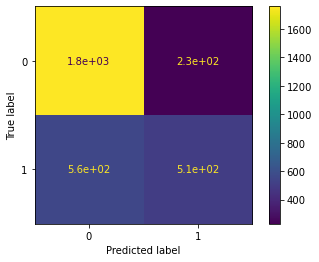

In [57]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=xgb_cv1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv1.classes_)
disp.plot();

**What type of errors are more common for your model?**

> _The model is twice as likely to predict a false negative than it is to predict a false positive. Therefore, type II errors are more common. For our use case, this is more desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one._

##### **Feature importance**

Use the `plot_importance` function to inspect the top 10 most important features of your final model.

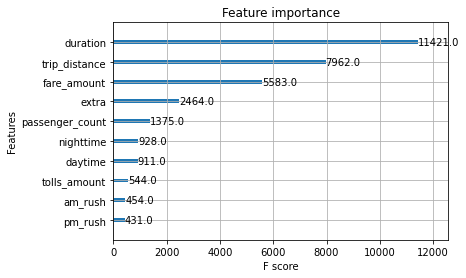

In [58]:
plot_importance(xgb_cv1.best_estimator_, max_num_features=10);

### Execute stage

#### **Step 4: Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  
_This is not a great model, but depending on how it's used it could still be useful. If the objective is only to help give taxi drivers a better idea of whether someone will leave a good tip, then it could be useful. It may be worthwhile to test it with a select group of taxi drivers to get feedback._

2. **What was your highest scoring model doing? Can you explain how it was making predictions?**   
_Unfortunately, XGBoost is not the most transparent machine learning algorithm. We know that `duration`, `trip_distance`, and `fare_amount` are the most important features, but we don't know how they influence tipping. This would require further exploration._

3. **Are there new features that you can engineer that might improve model performance?**   
_There are almost always additional features that can be engineered, but hopefully the most obvious ones were generated during the first round of modeling. In our case, we could try creating three new columns that indicate if the trip distance is short, medium, or far. We could also engineer a column that gives a ratio that represents (the amount of money from the fare amount to the nearest higher multiple of $5) / fare amount. For example, if the fare were \\$12, the value in this column would be 0.25, because \\$12 to the nearest higher multiple of \\$5 (\\$15) is \\$3, and \\$3 divided by \\$12 is 0.25. The intuition for this feature is that people might be likely to simply round up their tip, so journeys with fares with values just under a multiple of \\$5 may have lower tip percentages than those with fare values just over a multiple of \\$5. We could also do the same thing for fares to the nearest \\$10._
<br/>  


$$round5\_ratio = \frac{amount\ of\ money\ from\ the\ fare\ amount\ to\ the\ nearest\ higher\ multiple\ of\ $5}{fare\ amount}$$  

<br/>  

  <details>
    <summary><h5>HINT</h5></summary>
  $$ = \frac{5 - (fare\ mod\ 5)}{fare\ amount}$$  
  </details>


4. **What features would you want to have that would likely improve the performance of your model?**   
_It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash._

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. 

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders? 